In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
df=df[["Country","EdLevel","YearsCodePro","Employment","ConvertedComp"]]
df=df.rename({"ConvertedComp":"Salary"},axis=1)

In [5]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [6]:
df=df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [8]:
df=df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
df=df[df["Employment"]=="Employed full-time"]
df=df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [10]:
df["Country"].value_counts()

Country
United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [11]:
def categories(cat,cutoff):
  cat_map={}
  for i in range(len(cat)):
    if cat.values[i]>=cutoff:
      cat_map[cat.index[i]]=cat.index[i]
    else:
      cat_map[cat.index[i]]="Other"
  return cat_map

In [12]:
country_map=categories(df["Country"].value_counts(),400)
df["Country"]=df["Country"].map(country_map)
df["Country"].value_counts()

Country
Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: count, dtype: int64

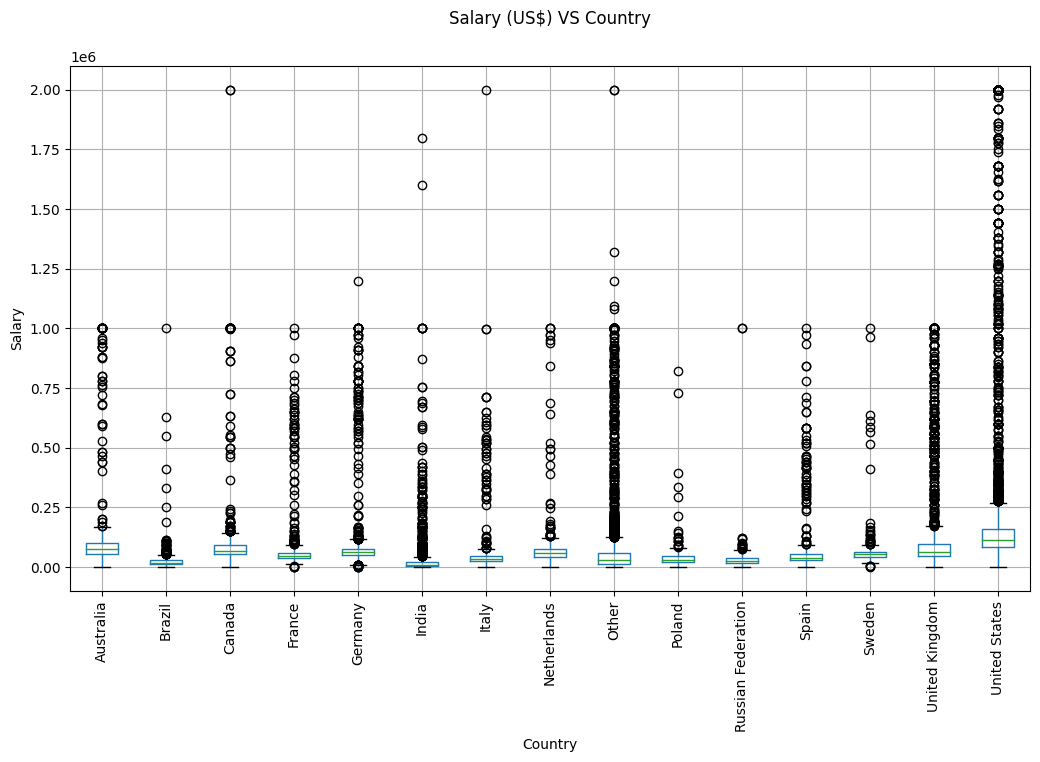

In [13]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) VS Country")
plt.title(' ')
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [14]:
df=df[df["Salary"]<=250000]
df=df[df["Salary"]>=10000]
df=df[df["Country"]!="Other"]

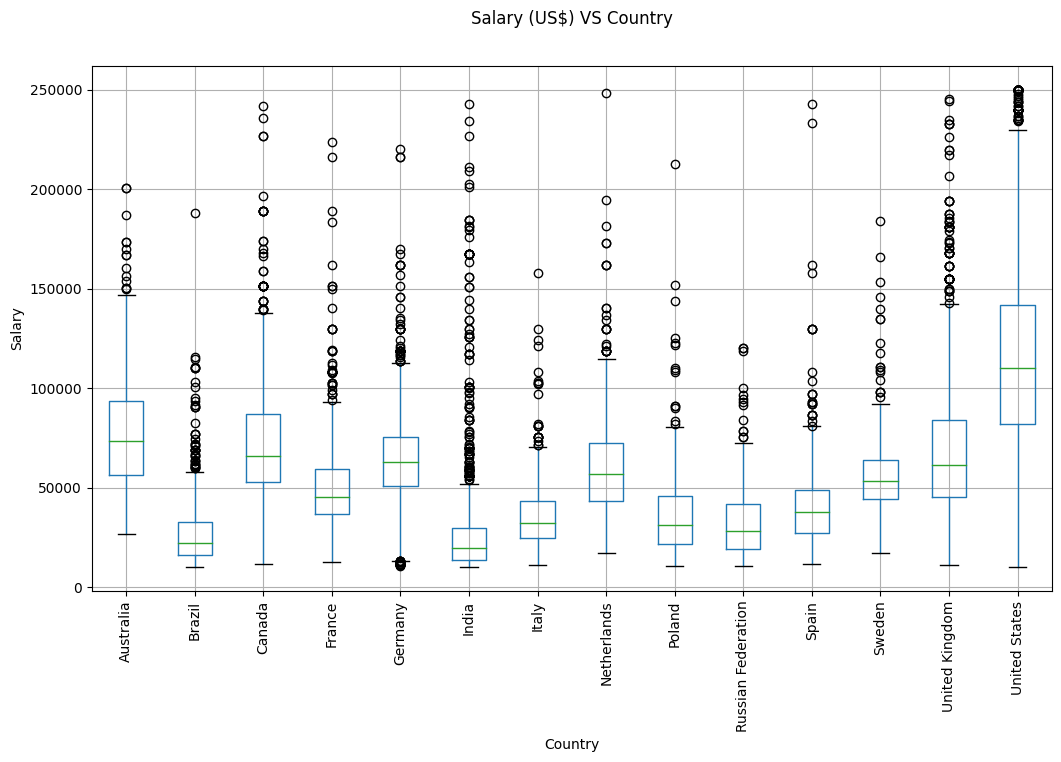

In [15]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) VS Country")
plt.title(' ')
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [16]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [17]:
def clean_exp(x):
  if x== "More than 50 years":
    return 50
  if x=="Less than 1 year":
    return 0.5
  return float(x)

df["YearsCodePro"]=df["YearsCodePro"].apply(clean_exp)

In [18]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [19]:
def clean_edu(x):
  if "Bachelor’s degree" in x:
    return "Bachelor’s degree"
  if "Master’s degree" in x:
    return "Master’s degree"
  if "Professional degree" in x or "other doctoral " in x:
    return "Post grad"
  return "Less than a Bachelors"
df["EdLevel"]=df["EdLevel"].apply(clean_edu)


In [20]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder

le_edu=LabelEncoder()
df["EdLevel"]=le_edu.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [22]:
le_country=LabelEncoder()
df["Country"]=le_country.fit_transform(df["Country"])
df["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [23]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
7,13,0,13.0,116000.0
9,12,2,4.0,32315.0
10,12,0,2.0,40070.0
11,10,1,7.0,14268.0
12,7,1,20.0,38916.0


In [24]:
X=df.drop(columns=["Salary"],axis=1)
y=df["Salary"]

In [25]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,1,12.0


In [26]:
y.values

array([116000.,  32315.,  40070., ...,  70000., 140000., 150000.])

In [27]:
from sklearn.linear_model import LinearRegression

lin=LinearRegression()
lin.fit(X,y.values)

LinearRegression()

In [28]:
y_pred=lin.predict(X)

In [29]:
from sklearn.metrics import mean_squared_error,mean_squared_error
error=np.sqrt(mean_squared_error(y,y_pred))

In [30]:
error

39253.21049734322

In [31]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y.values)

DecisionTreeRegressor(random_state=0)

In [32]:
y_pred=dec_tree_reg.predict(X)

In [33]:
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$29,687.49


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
random=RandomForestRegressor(random_state=0)
random.fit(X,y.values)

RandomForestRegressor(random_state=0)

In [36]:
y_pred=random.predict(X)

In [37]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,746.48


In [38]:
from sklearn.model_selection import GridSearchCV
max_depth=[None,2,4,6,8,10,12]
para={"max_depth":max_depth}

regressor=DecisionTreeRegressor(random_state=0)
gs=GridSearchCV(regressor,para,scoring="neg_mean_squared_error")
gs.fit(X,y.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [39]:
regressor=gs.best_estimator_
regressor

DecisionTreeRegressor(max_depth=8, random_state=0)

In [40]:
regressor=gs.best_estimator_
regressor.fit(X,y.values)
y_pred=regressor.predict(X)
error=np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$30,569.90


In [41]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,1,12.0


In [42]:
h=np.array([["United States","Master's degree",15]])
h

array([['United States', "Master's degree", '15']], dtype='<U21')

In [43]:
h[0]

array(['United States', "Master's degree", '15'], dtype='<U21')

In [44]:
import pickle

In [45]:
data={"model":regressor,"le_country":le_country,"le_edu":le_edu}
with open("saved_steps.pkl","wb") as file:
  pickle.dump(data,file)

In [46]:
with open("saved_steps.pkl","rb") as file:
  data=pickle.load(file)


In [47]:
regressor_load=data["model"]
le_country=data["le_country"]
le_edu=data["le_edu"]

In [63]:
values = np.array([["United States", 'Bachelor’s degree', 15]])
values[:,1]

array(['Bachelor’s degree'], dtype='<U21')

In [64]:
country_encode=le_country.transform(values[:,0])
country_encode

array([13])

In [65]:
edu_encode=le_edu.transform(values[:,1])
edu_encode

array([0])

In [66]:
values[:,0]=country_encode
values[:,1]=edu_encode

In [67]:
values

array([['13', '0', '15']], dtype='<U21')

In [68]:
y_pred=regressor_load.predict(values)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([130520.39932886])